In [ ]:
from google.colab import files
import pandas as pd

files.upload()

In [ ]:
path = "/content/task.csv"
initialDataframe = pd.read_csv(path)

In [ ]:
initialDataframe.head()

,question,label
0,طارند بالا ، چه چیزی است؟,1
1,طارند بالا ، روستایی از توابع کجا است؟,1
2,طارند بالا ، روستایی از توابع کجا در استان ته...,1
3,طارند بالا ، روستایی از توابع بخش جلیل آباد ش...,1
4,کجا روستایی در استان تهران ایران است,1


In [ ]:
initialDataframe.shape

(2651, 2)

In [ ]:
initialDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2651 non-null   object
 1   label     2651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB


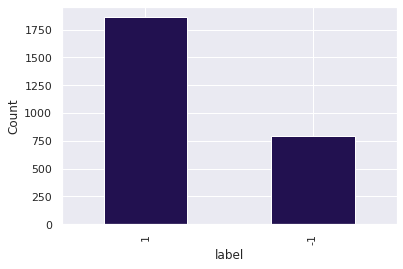

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


palette=sns.color_palette('magma')
sns.set(palette=palette)


initialDataframe['label'].value_counts().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

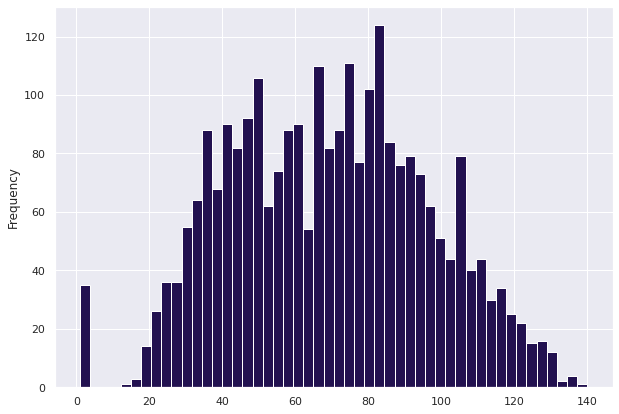

In [ ]:
initialDataframe['length']=initialDataframe['question'].apply(len)

initialDataframe['length'].plot(bins=50, kind='hist',figsize=(10,7))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

tfidf = TfidfVectorizer()
text = tfidf.fit_transform(initialDataframe['question'])
x_train, x_test, y_train, y_test= train_test_split(text, initialDataframe['label'], test_size=0.20, random_state=1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(2120, 1568)
(531, 1568)
(2120,)
(531,)


In [ ]:
tfidf.vocabulary_

{'طارند': 867,
 'بالا': 234,
 'چه': 1346,
 'چیزی': 1352,
 'است': 93,
 'روستایی': 641,
 'از': 89,
 'توابع': 362,
 'کجا': 1381,
 'در': 531,
 'استان': 95,
 'تهران': 359,
 'ایران': 201,
 'بخش': 242,
 'جلیل': 421,
 'آباد': 11,
 'شهرستان': 822,
 'پیشوا': 1331,
 'آآ': 0,
 'قرمز': 963,
 'نام': 1151,
 'یک': 1498,
 'گونه': 1478,
 'سرده': 736,
 'یکی': 1499,
 'می': 1133,
 'باشد': 229,
 'که': 1426,
 'قرار': 962,
 'جایگزین': 414,
 'قطارهای': 966,
 'سریع': 741,
 'السیر': 141,
 'فرانسه': 913,
 'شود': 828,
 'شرکت': 803,
 'آلستوم': 36,
 'سازمانی': 715,
 'تا': 305,
 'آن': 47,
 'صداهای': 850,
 'انسانی': 170,
 'ما': 1008,
 'را': 598,
 'بیدار': 293,
 'کنندچه': 1422,
 'کنند': 1420,
 'سال': 719,
 '۲۰۰۲': 1538,
 'منتشر': 1115,
 'شد': 796,
 'فیلم': 952,
 'سبک': 726,
 'ملودرام': 1107,
 'زمانی': 683,
 'تاباسکو': 308,
 'تجاری': 325,
 'ثابت': 377,
 'پنجه': 1322,
 'امروزه': 158,
 'تنها': 357,
 'باقی': 233,
 'مانده': 1025,
 'ای': 196,
 'پستانداران': 1314,
 'گوشتخوار': 1476,
 'تیره': 373,
 'گربه': 1456,
 'ایان': 199,


In [ ]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['آآ',
 'آآارگیرولپیس',
 'آآدونتا',
 'آآدونتای',
 'آآرونشونیا',
 'آآهیرونیمی',
 'آآپتوس',
 'آآکلمبیانا',
 'آا',
 'آاویوا',
 'آب',
 'آباد',
 'آبامیری',
 'آباکسا',
 'آبدانان',
 'آتشین',
 'آثار',
 'آذربایجان',
 'آرامش',
 'آرانا',
 'آراگون',
 'آرمانی',
 'آرواره',
 'آرچی',
 'آزاد',
 'آساشیو',
 'آستراخان',
 'آستین',
 'آسفالت',
 'آسمان',
 'آسمانی',
 'آشکارا',
 'آغاز',
 'آقا',
 'آلاما',
 'آلبوم',
 'آلستوم',
 'آلفا',
 'آلمانی',
 'آلیمیا',
 'آم',
 'آمارینیا',
 'آمد',
 'آمریکا',
 'آمریکای',
 'آمریکایی',
 'آمیت',
 'آن',
 'آناسوفیا',
 'آنجلس',
 'آندرا',
 'آنلاین',
 'آنگولا',
 'آهنگساز',
 'آهنگی',
 'آوازخوان',
 'آوازه',
 'آواکیان',
 'آوردن',
 'آوریل',
 'آویان',
 'آپارادانتا',
 'آپیا',
 'آچرالایگ',
 'آچیل',
 'آکانییسا',
 'آکندورو',
 'آیت',
 'آیند',
 'ابد',
 'ابوالقاسم',
 'اتحاد',
 'اتریش',
 'اتلتیک',
 'اتم',
 'اجتماعی',
 'اجرام',
 'احسان',
 'احسانبخش',
 'احمدکندی',
 'اخترفیزیک',
 'اخترفیزیکدانی',
 'ارتباط',
 'ارتش',
 'اردبیل',
 'اردوی',
 'ارمنی',
 'ارکسان',
 'ارگانیسم',
 'از',
 'ازدواج',
 'ازومدل',
 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

# grid search

In [ ]:
svc = SVC(random_state=42)
linear_svc = LinearSVC(random_state=42)
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
nb_bernoli = BernoulliNB()
nb_multinomial = MultinomialNB()

lr = LogisticRegression()
sgd = SGDClassifier(random_state=42)






params_svc = {'kernel' : ['rbf'] , 'C' : [0.1 , 1 ,10,100,1000] , 'gamma' : [0.1 , 0.01 , 0.001]} #, 'poly', 'rbf', 'sigmoid', 'precomputed'
params_linear_svc ={'penalty' : [ 'l2'] , 'C' : [0.1 , 1 ,10,100,1000] }
params_knn = {'n_neighbors' :[2,4,6,8,10,12,14,16,18] , 'metric' : ['minkowski' , "euclidean","manhattan"] ,  "weights": ["uniform","distance"] , "leaf_size": [1,3,5,12,30]}
params_adaboost = {'n_estimators' :[10,20,30,40,50]}
params_random_forest = {'n_estimators' :[60,80,100,120,140] , 'criterion' : ['gini' , 'entropy'] , 'min_samples_leaf' : [1,3,10] , 'max_features' : [1,3,10] , 'min_samples_split' : [2,3,10]}
params_nb_gaussian = {}
params_nb_bernoli = {}
params_lr = {'penalty': ['l1' , 'l2' , 'None']  , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
params_sgd = {'penalty' : ['l2', 'l1', 'elasticnet'] , 'alpha' : [0.1 , 0.01 , 0.001 , 0.0001]}





models = [sgd,linear_svc,knn,adaboost ,random_forest,lr,svc,nb_bernoli]
models_name = ['sgd','linear svc','knn','adaboost' ,'random forest' ,'lr','svc','bayes bernoli' ]
models_params = [params_sgd,params_linear_svc,params_knn,params_adaboost ,params_random_forest
                ,params_lr,params_svc,params_nb_bernoli]






In [ ]:
def calculation(model , xtrain , xtest , ytrain , ytest) :

  model.fit(xtrain , ytrain)
  y_pred_test = model.predict(xtest)
  y_pred_train = model.predict(xtrain)


  accuracy_score_train = accuracy_score(ytrain ,y_pred_train)
  accuracy_score_test = accuracy_score(ytest , y_pred_test)
  roc_score = roc_auc_score(ytest , y_pred_test)
  choosen_estimatore = model.best_estimator_
  mse_error = mean_squared_error(ytest , y_pred_test)
  clf_report = classification_report(ytest , y_pred_test)
  conf_matrix = confusion_matrix(ytest , y_pred_test)



  print("----------------------------")
  print(f'train accuracy score : {accuracy_score_train}')
  print("----------------------------") 
  print(f'acuuracy score test : {accuracy_score_test}')
  print("----------------------------")
  print(f'roc auc score : {roc_score}')
  print("----------------------------")
  print(f'mean square error : {mse_error}')
  print("----------------------------")
  print(f'best estimator :\n{choosen_estimatore}')
  print("----------------------------")
  print(f'classification  report :\n{clf_report}')




  acc_train.append(accuracy_score_train)
  acc_test.append(accuracy_score_test)
  acc_roc.append(roc_score)
  mse.append(mse_error)
  best_estimators.append(choosen_estimatore)
  clfs.append(clf_report)



  sns.set_style("dark")
  fig_score , ax_score = plt.subplots(nrows=1 , ncols=2 , figsize=(12,6))
  ax_score[0].set_title('confusion matrix')
  plot_confusion_matrix(ax=ax_score[0] , estimator=model , X=xtest , y_true=ytest  , cmap='autumn' )
  fpr , tpr , thresh = roc_curve(ytrain ,y_pred_train)
  ax_score[1].plot(fpr , tpr ,  color='darkturquoise' , label = 'train')
  fpr , tpr , thresh = roc_curve(ytest , y_pred_test )
  ax_score[1].plot(fpr , tpr , color='lightcoral' , label = 'test')

  ax_score[1].legend(loc='lower right')
  ax_score[1].set_title('roc curve')
  ax_score[1].plot([0,1] , [0,1] , color='black' , linestyle='--' )

  fig_score.suptitle(models_name[i] , size = 20)

  plt.show()
  print('\n\n')


*********************************************************************************************
**************************************sgd******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.8702830188679245
----------------------------
acuuracy score test : 0.7664783427495292
----------------------------
roc auc score : 0.7097617950911365
----------------------------
mean square error : 0.9340866290018832
----------------------------
best estimator :
SGDClassifier(penalty='l1', random_state=42)
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.65      0.56      0.60       167
           1       0.81      0.86      0.84       364

    accuracy                           0.77       531
   macro avg       0.73      0.71      0.72       531
weighted avg       0.76      0.77     

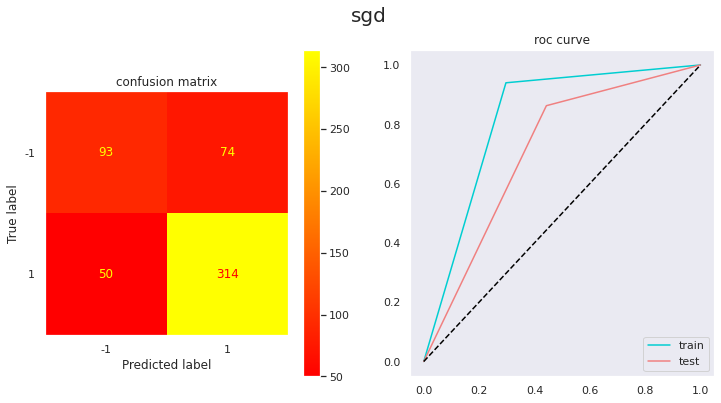




*********************************************************************************************
**************************************linear svc******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.9009433962264151
----------------------------
acuuracy score test : 0.7627118644067796
----------------------------
roc auc score : 0.7280795551753636
----------------------------
mean square error : 0.9491525423728814
----------------------------
best estimator :
LinearSVC(C=100, random_state=42)
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.62      0.63      0.63       167
           1       0.83      0.82      0.83       364

    accuracy                           0.76       531
   macro avg       0.73      0.73      0.73       531
weighted avg       0.76      0.76      

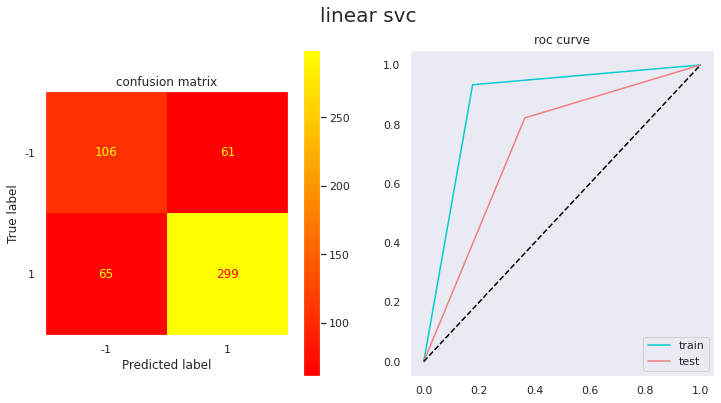




*********************************************************************************************
**************************************knn******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.9226415094339623
----------------------------
acuuracy score test : 0.775894538606403
----------------------------
roc auc score : 0.7328337829834837
----------------------------
mean square error : 0.896421845574388
----------------------------
best estimator :
KNeighborsClassifier(leaf_size=1, n_neighbors=18, weights='distance')
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.65      0.62      0.63       167
           1       0.83      0.85      0.84       364

    accuracy                           0.78       531
   macro avg       0.74      0.73      0.74       531
weighted avg

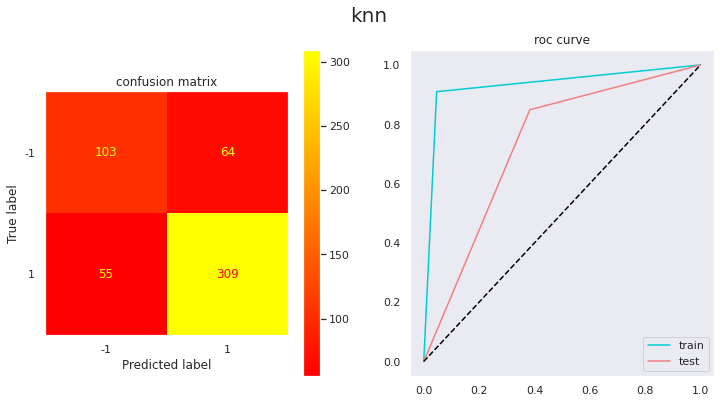




*********************************************************************************************
**************************************adaboost******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.8028301886792453
----------------------------
acuuracy score test : 0.768361581920904
----------------------------
roc auc score : 0.7143761926696058
----------------------------
mean square error : 0.9265536723163842
----------------------------
best estimator :
AdaBoostClassifier(n_estimators=40, random_state=42)
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.65      0.57      0.61       167
           1       0.81      0.86      0.84       364

    accuracy                           0.77       531
   macro avg       0.73      0.71      0.72       531
weighted avg       0.76

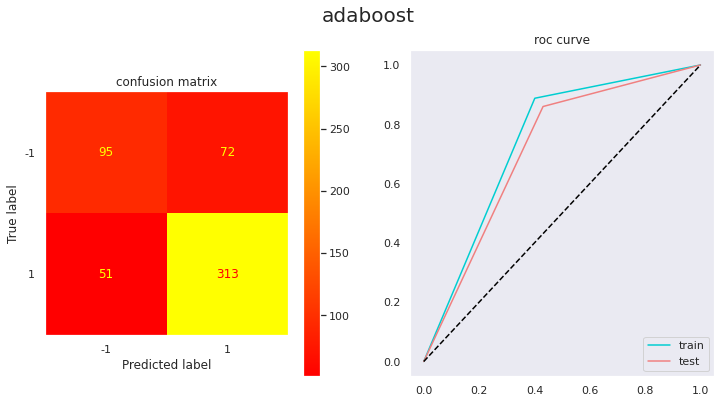




*********************************************************************************************
**************************************random forest******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.9226415094339623
----------------------------
acuuracy score test : 0.7608286252354048
----------------------------
roc auc score : 0.7121224583799435
----------------------------
mean square error : 0.9566854990583804
----------------------------
best estimator :
RandomForestClassifier(criterion='entropy', max_features=10, n_estimators=60,
                       random_state=42)
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.63      0.58      0.60       167
           1       0.81      0.84      0.83       364

    accuracy                           0.76       531
   mac

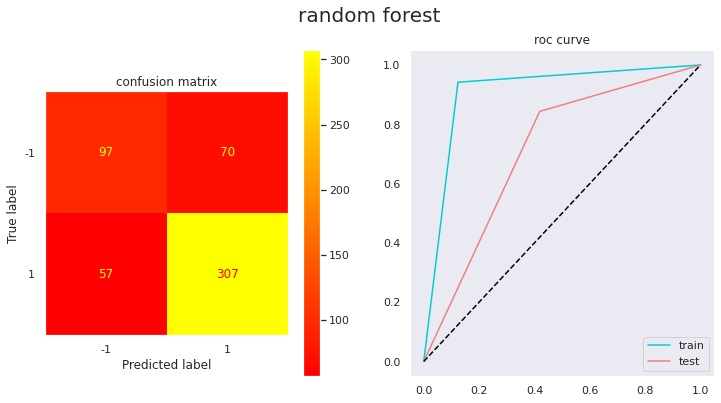




*********************************************************************************************
**************************************lr******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.7787735849056604
----------------------------
acuuracy score test : 0.736346516007533
----------------------------
roc auc score : 0.6245887346186747
----------------------------
mean square error : 1.054613935969868
----------------------------
best estimator :
LogisticRegression(penalty='l1', solver='liblinear')
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.67      0.32      0.44       167
           1       0.75      0.93      0.83       364

    accuracy                           0.74       531
   macro avg       0.71      0.62      0.63       531
weighted avg       0.72      0

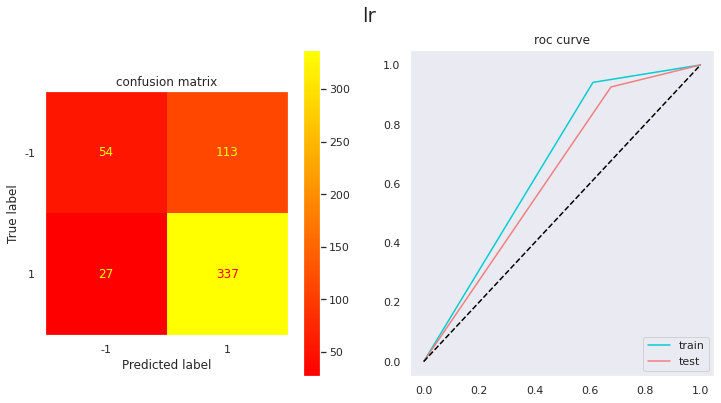




*********************************************************************************************
**************************************svc******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.9207547169811321
----------------------------
acuuracy score test : 0.7702448210922788
----------------------------
roc auc score : 0.7432963742843981
----------------------------
mean square error : 0.9190207156308852
----------------------------
best estimator :
SVC(C=1000, gamma=0.1, random_state=42)
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.63      0.67      0.65       167
           1       0.84      0.82      0.83       364

    accuracy                           0.77       531
   macro avg       0.73      0.74      0.74       531
weighted avg       0.78      0.77      0

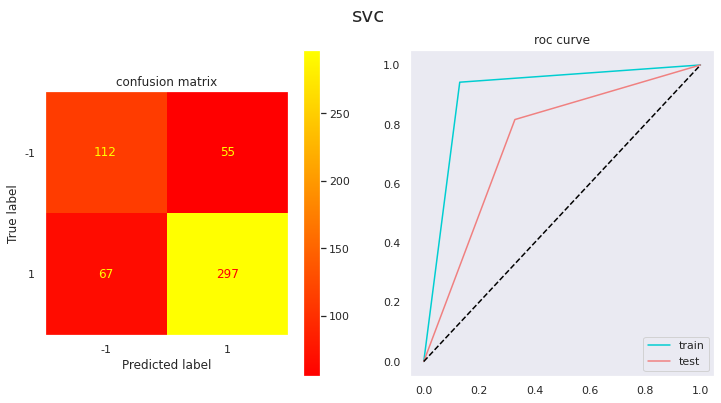




*********************************************************************************************
**************************************bayes bernoli******************************************
*********************************************************************************************
----------------------------
train accuracy score : 0.7584905660377359
----------------------------
acuuracy score test : 0.7344632768361582
----------------------------
roc auc score : 0.7090955451733895
----------------------------
mean square error : 1.0621468926553672
----------------------------
best estimator :
BernoulliNB()
----------------------------
classification  report :
              precision    recall  f1-score   support

          -1       0.57      0.64      0.60       167
           1       0.83      0.78      0.80       364

    accuracy                           0.73       531
   macro avg       0.70      0.71      0.70       531
weighted avg       0.74      0.73      0.74       531



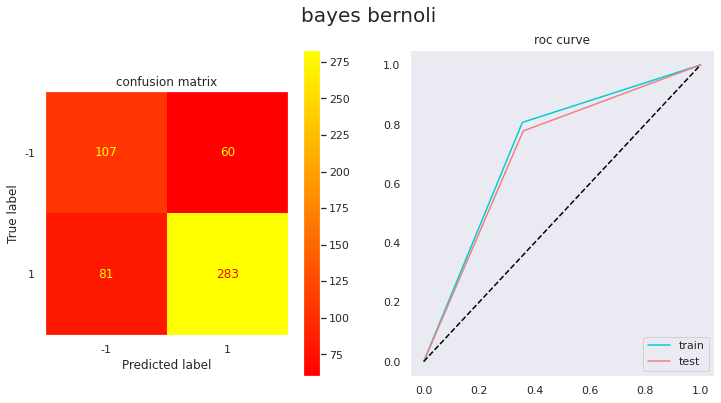

In [ ]:

acc_train = []
acc_test = []
acc_roc = []
mse = []
best_estimators = []
clfs  = []



for i in range(len(models)):
# for (model,name,param) in zip(models , models_name , models_params):
  clf = GridSearchCV(estimator=models[i] ,
                     param_grid=models_params[i] ,
                     cv=StratifiedKFold(n_splits=10),
                     scoring='accuracy',
                     n_jobs=-1,
                     )
  
  print('*********************************************************************************************')
  print(f'**************************************{models_name[i]}******************************************')
  print('*********************************************************************************************')


  calculation(model=clf , xtrain=x_train , xtest=x_test , ytrain=y_train , ytest=y_test)



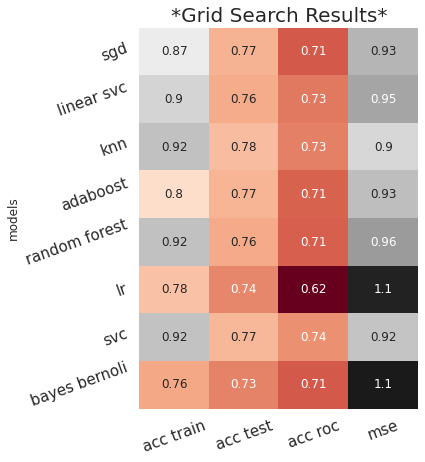

In [ ]:

result_df = pd.DataFrame({'models' : models_name ,'acc train' : acc_train,'acc test' : acc_test,'acc roc' : acc_roc,'mse' : mse})

result_df.index = result_df['models']
result_df = result_df.drop(['models'] , axis=1)


f , ax = plt.subplots(figsize=(5,7))

sns.heatmap(result_df,
            cmap='RdGy' , 
            annot=True ,
            annot_kws={'size' : 12},
            cbar=False)
plt.title("*Grid Search Results*" , size = 20)
plt.xticks(size=15 ,rotation=20 )
plt.yticks(size=15 ,rotation=20 )
plt.show()

In [ ]:
sort_cv = result_df.reset_index().sort_values('acc test' , ascending=False)[:4]
print(sort_cv)

     models  acc train  acc test   acc roc       mse
2       knn   0.922642  0.775895  0.732834  0.896422
6       svc   0.920755  0.770245  0.743296  0.919021
3  adaboost   0.802830  0.768362  0.714376  0.926554
0       sgd   0.870283  0.766478  0.709762  0.934087


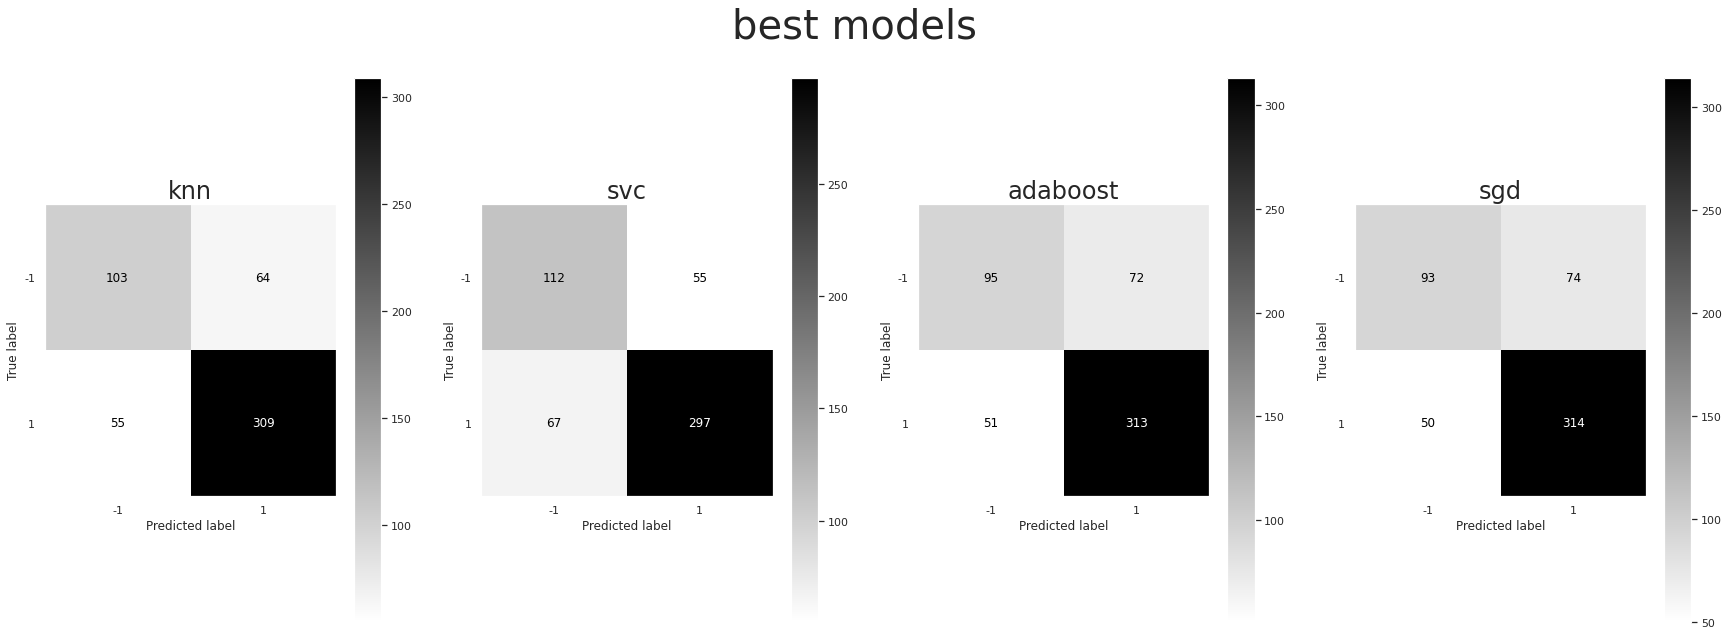

In [ ]:
ff ,axx = plt.subplots(nrows=1 , ncols=4 , figsize=(30,10))
ff.suptitle('best models' , size=40)

for (i,index) in enumerate((2,6,3,0)):
  plot_confusion_matrix(best_estimators[index] , X=x_test , y_true=y_test ,ax=axx[i] , cmap='gray_r' , )
  axx[i].set_title(label=models_name[index] ,size=24 )

plt.show()